In [ ]:
listofquarter = []
listofquarter.append("Verdun, Montreal, Canada")
listofquarter.append("LaSalle, Montreal, Canada")
listofquarter.append("Borough of Lachine, Montreal, Canada")
listofquarter.append("Saint-Laurent, Montreal, Canada")
listofquarter.append("Le Sud-Ouest, Montreal, Canada")
listofquarter.append("Côte-des-Neiges-Notre-Dame-de-Grâce, Montreal, Canada")
listofquarter.append("Ville-Marie, Montreal, Canada")
listofquarter.append("Outremont, Montreal, Canada")
listofquarter.append("Le Plateau-Mont-Royal, Montreal, Canada")
listofquarter.append("Rosemont-La Petite-Patrie, Montreal, Canada")
listofquarter.append("Hochelaga, Montreal, Canada")
listofquarter.append("Maisonneuve, Montreal, Canada")
listofquarter.append("Anjou, Montreal, Canada")
listofquarter.append("Rivière-des-Prairies, Montreal, Canada")
listofquarter.append("Pointe-aux-Trembles, Montreal, Canada")
listofquarter.append("Montréal-Nord, Montreal, Canada")
listofquarter.append("Saint-Léonard, Montreal, Canada")
listofquarter.append("Villeray-Saint-Michel-Parc-Extension, Montreal, Canada")
listofquarter.append("Ahuntsic, Montreal, Canada")
listofquarter.append("Cartierville, Montreal, Canada")
listofquarter.append("Pierrefonds-Roxboro, Montreal, Canada")
listofquarter.append("L'île-Bizard-Sainte-Geneviève, Montreal, Canada")

In [ ]:
len(listofquarterquarter)

In [16]:
def pull_all_graph(list_quarter):
    graph_of_quarter_drive = []
    graph_of_quarter_walk = []
    for i in range(len(list_quarter)):
        print(list_quarter[i])
        quarter = ox.graph_from_place(list_quarter[i], network_type='drive')
        print(ox.plot_graph(quarter))
        graph_of_quarter_drive.append(quarter)
        quarter_walk = ox.graph_from_place(list_quarter[i], network_type='walk')
        print(ox.plot_graph(quarter_walk))
        graph_of_quarter_walk.append(quarter_walk)

    return (graph_of_quarter_drive, graph_of_quarter_walk)


In [17]:
def find_size_of_each_quarter(list_quarter, list_graph):
    arrayoflength = []
    allroad = 0
    for i in range(len(list_quarter)):
        print(list_quarter[i])
        proj = ox.project_graph(list_graph[i])
        nodes_proj = ox.graph_to_gdfs(proj, edges=False)
        graph_area_m = nodes_proj.unary_union.convex_hull.area
        length_road = ox.basic_stats(proj, area=graph_area_m, clean_int_tol=15)["edge_length_total"]
        arrayoflength.append(length_road)
        allroad += length_road
        print(length_road)
    return (allroad, arrayoflength)

In [18]:
import math


def divide_nb_snowplot_by_quarter(array_size_quarter, total_size, nb_drive_snowplot):
    deneigeuseperquarter = []
    for i in range(len(array_size_quarter)):
        nb_deneigeuse = math.floor((nb_drive_snowplot * array_size_quarter[i]) / total_size)
        print(str(listofquarter[i]) + " : " + str(nb_deneigeuse))
        deneigeuseperquarter.append(nb_deneigeuse)

    print(deneigeuseperquarter)
    return deneigeuseperquarter

In [19]:
import osmnx as ox
import networkx as nx
import numpy as np

In [ ]:
def divideeulerbynbdeneigeuse(nbd, circuit, G):
    size = len(circuit)
    start_node = circuit[0]
    size_circuit = size // nbd
    result = []
    tmp = []
    nb = 0
    for i in circuit:
        if ( nb >= size_circuit):
            if (tmp[0] != start_node):
                st = ox.shortest_path(G, start_node, tmp[0])
                st.pop()
                tmp = st + tmp

            if (tmp[len(tmp) - 1] != start_node):
                st = ox.shortest_path(G, tmp[len(tmp) - 1], start_node)
                tmp.pop()
                tmp = tmp + st

            result.append(tmp)
            tmp = []
            nb = 0
        tmp.append(i)
        nb += 1
    if (tmp != [] and len(result) < nbd):
        result.append(tmp)
    return result

In [ ]:
def find_road_for_each_snowplot_in_quarter(which_quarter, nb_snowplot, listofquarter, graph_quarter, speed_snowplot):
    print("========================================================================")
    print("====================== " + listofquarter[which_quarter] + " =======================")
    Hoch_unordered = ox.get_undirected(graph_quarter[which_quarter])   
    H = nx.eulerize(Hoch_unordered)
    print("The graph is eulerian : " + str(nx.is_eulerian(H)))

    Hoch_unordered = ox.speed.add_edge_speeds(Hoch_unordered)
    Hoch_unordered = ox.speed.add_edge_travel_times(Hoch_unordered)

    euler_circuit = [u for u, v in nx.eulerian_circuit(H)]
    print(euler_circuit)

    print("show the eulerian circuit : ")
    print(ox.plot_graph_route(Hoch_unordered, euler_circuit, node_size=0))

    allcircuitquarter = divideeulerbynbdeneigeuse(nb_snowplot, euler_circuit, Hoch_unordered)

    for i in allcircuitquarter:
        print(i)
        print(ox.plot_graph_route(Hoch_unordered, i, node_size=0))
    
        edge_lengths = ox.utils_graph.get_route_edge_attributes(Hoch_unordered, i, "length")
        length = round(sum(edge_lengths))
        print("length of road : " + str(length))
        time_for_deneigeuse = ((length / 1000) * 60) / speed_snowplot
        print("time : "+ str(time_for_deneigeuse) + str(" minutes"))

In [ ]:
def show_road_for_each_snowplot(arr, listofquarter, graph_quarter, speed_snowplot):
    for i in range(len(arr)):
        find_road_for_each_snowplot_in_quarter(i, arr[i],listofquarter, graph_quarter, speed_snowplot)

Verdun, Montreal, Canada


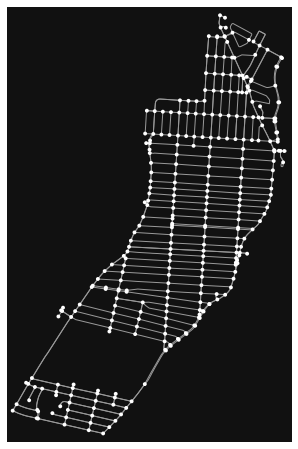

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


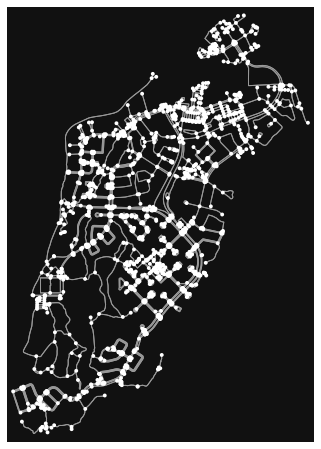

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
LaSalle, Montreal, Canada


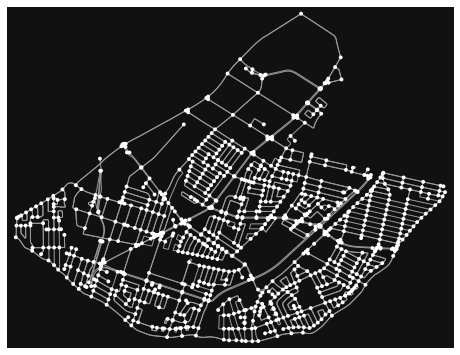

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


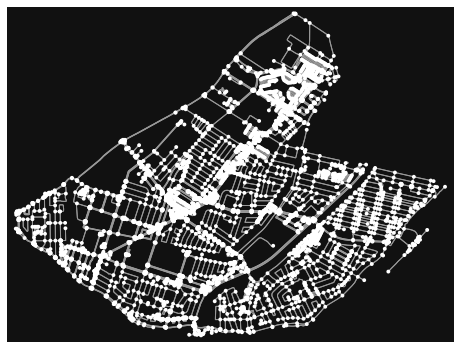

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Borough of Lachine, Montreal, Canada


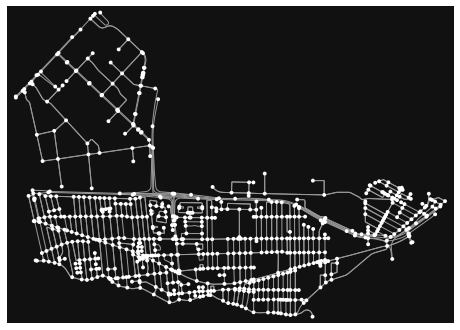

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


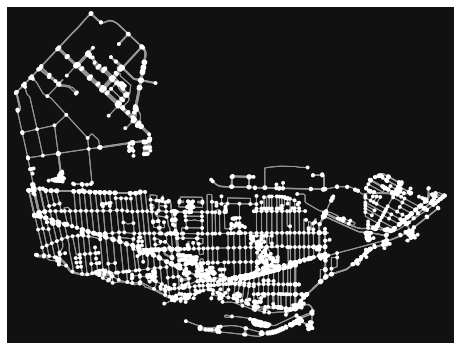

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Saint-Laurent, Montreal, Canada


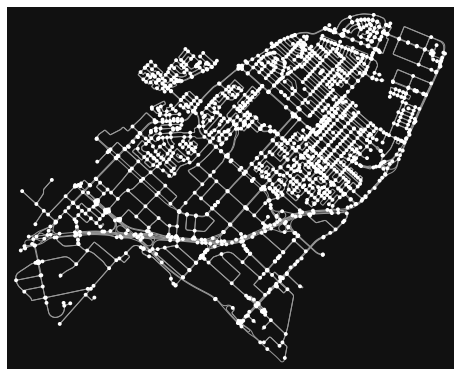

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


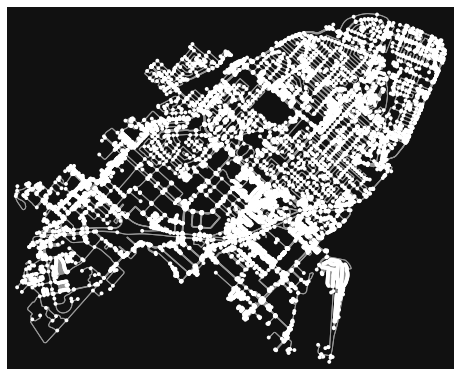

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Le Sud-Ouest, Montreal, Canada


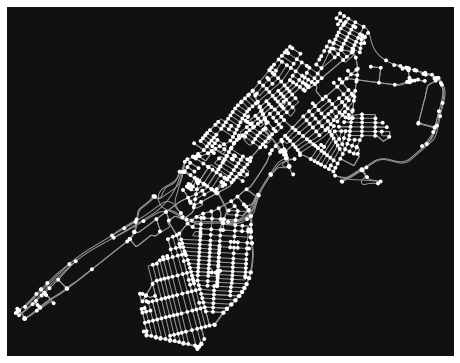

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


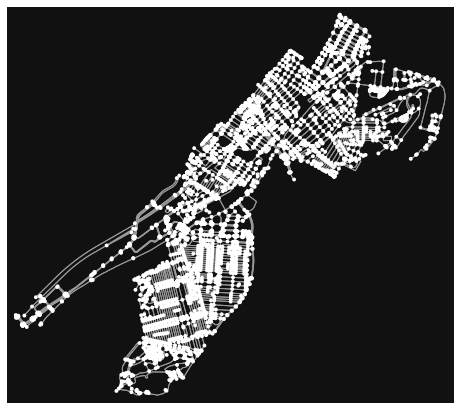

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Côte-des-Neiges-Notre-Dame-de-Grâce, Montreal, Canada


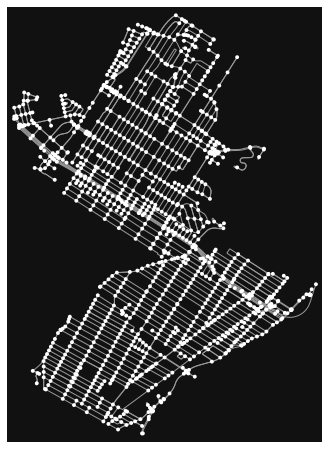

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


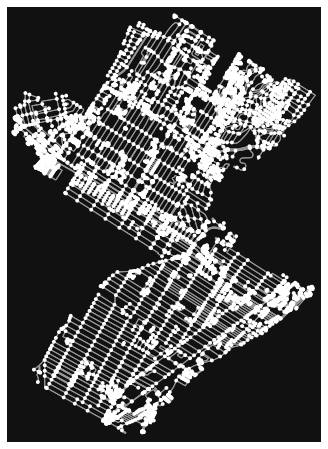

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Ville-Marie, Montreal, Canada


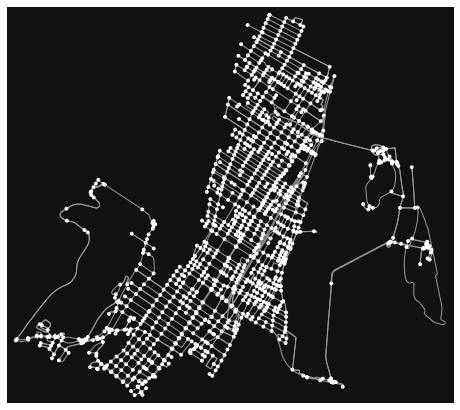

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


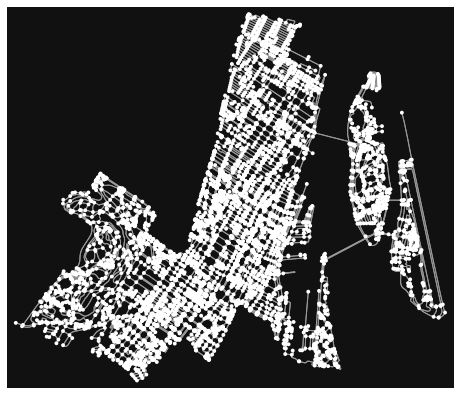

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Outremont, Montreal, Canada


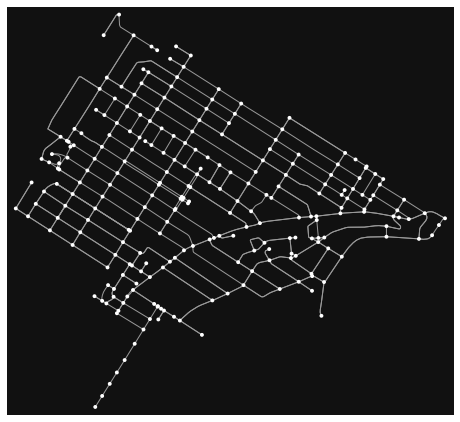

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


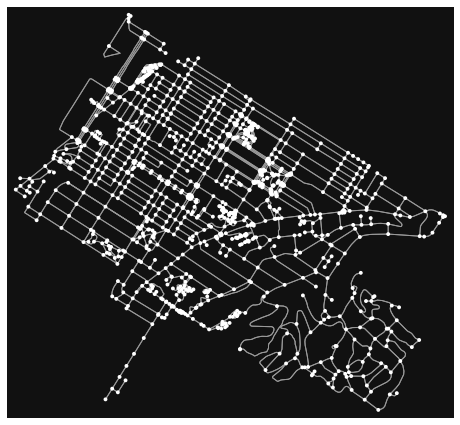

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Le Plateau-Mont-Royal, Montreal, Canada


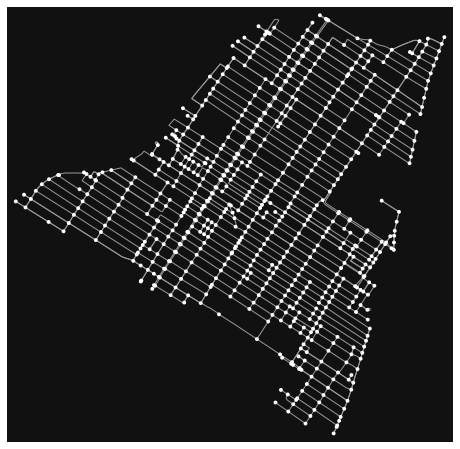

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


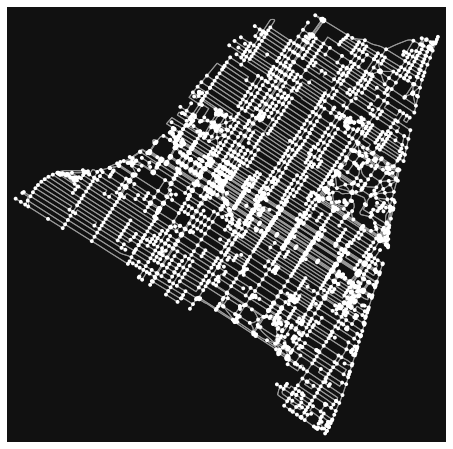

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Rosemont-La Petite-Patrie, Montreal, Canada


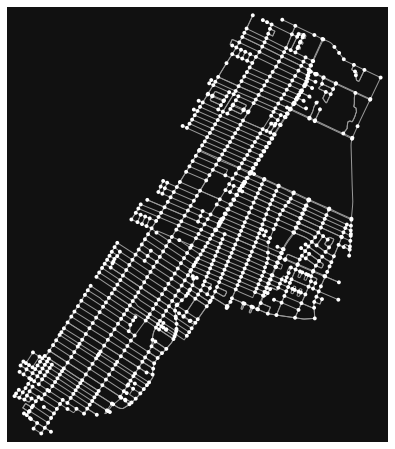

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


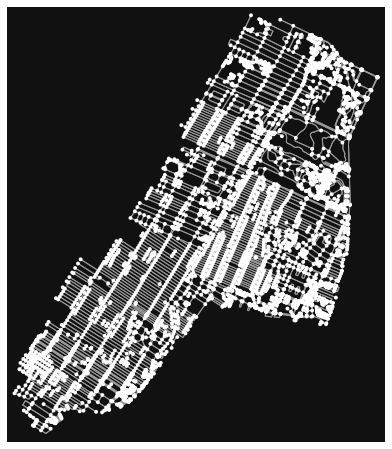

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Hochelaga, Montreal, Canada


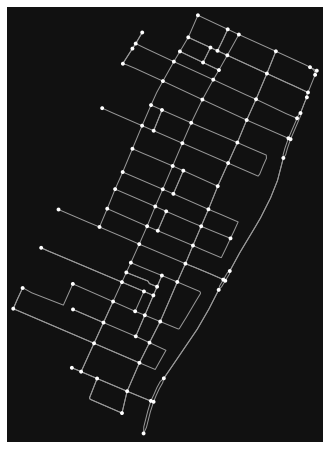

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


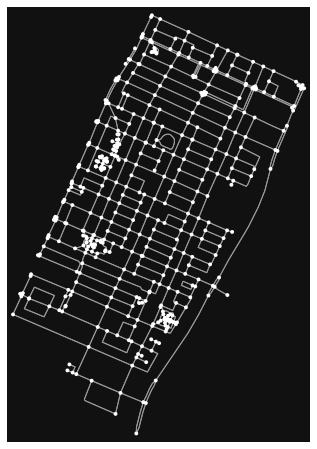

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Maisonneuve, Montreal, Canada


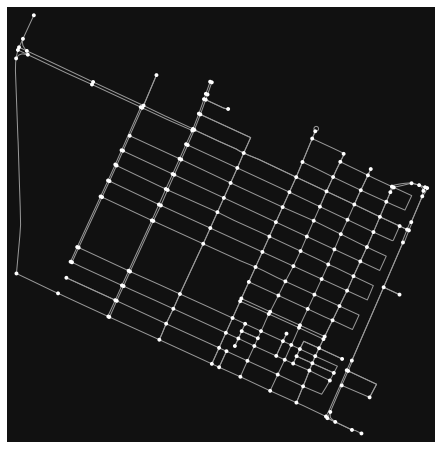

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


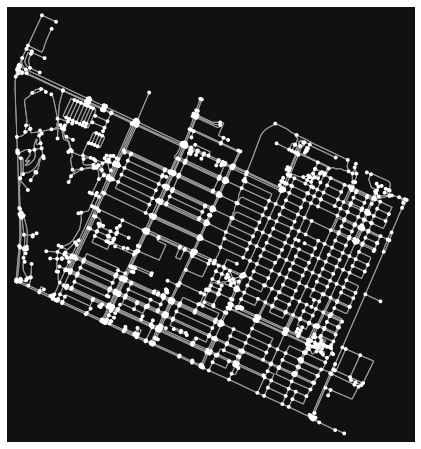

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Anjou, Montreal, Canada


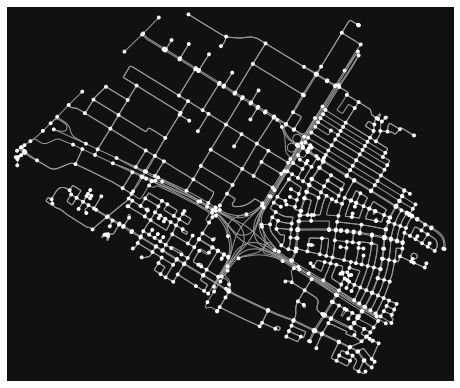

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


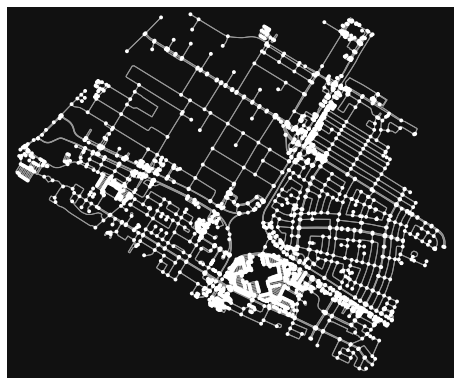

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Rivière-des-Prairies, Montreal, Canada


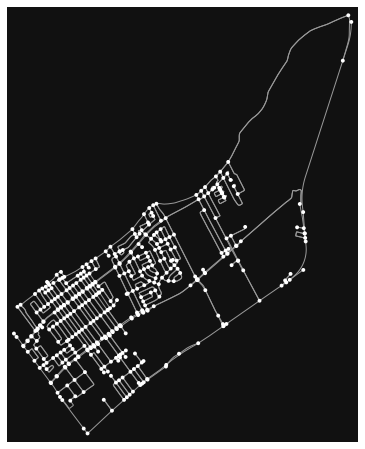

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


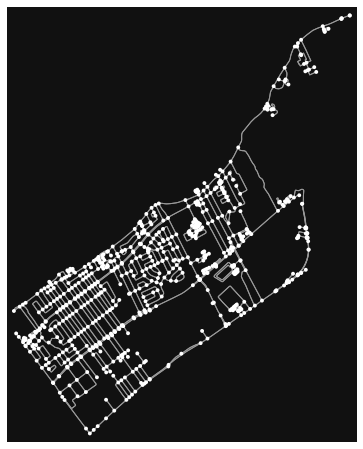

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Pointe-aux-Trembles, Montreal, Canada


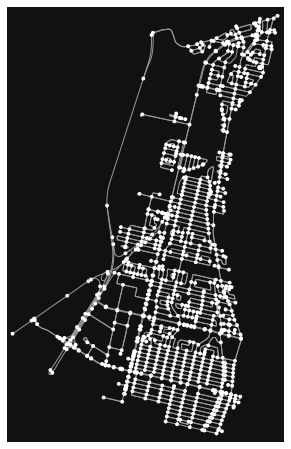

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


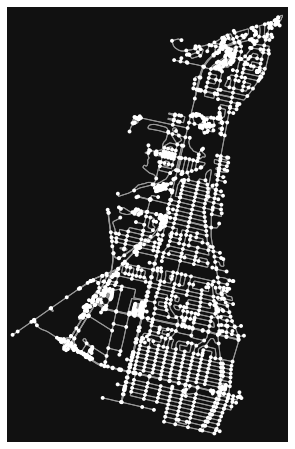

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Montréal-Nord, Montreal, Canada


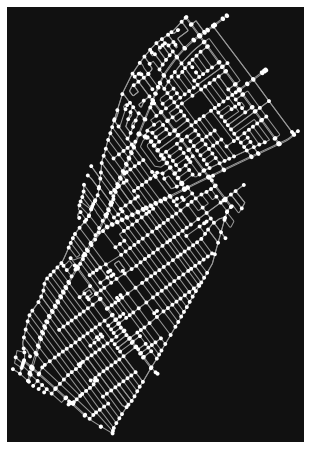

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


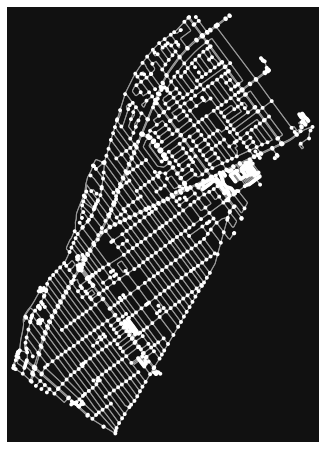

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Saint-Léonard, Montreal, Canada


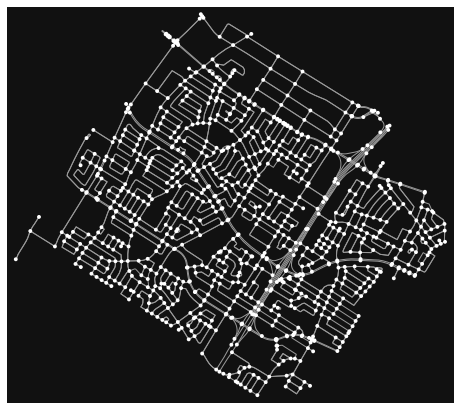

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


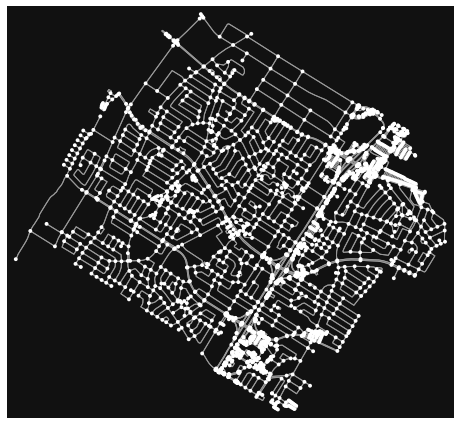

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Villeray-Saint-Michel-Parc-Extension, Montreal, Canada


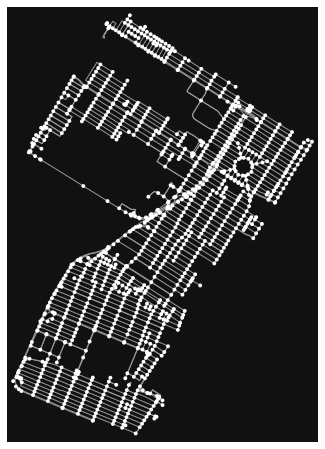

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


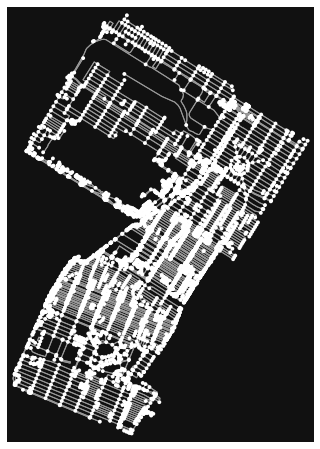

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Ahuntsic, Montreal, Canada


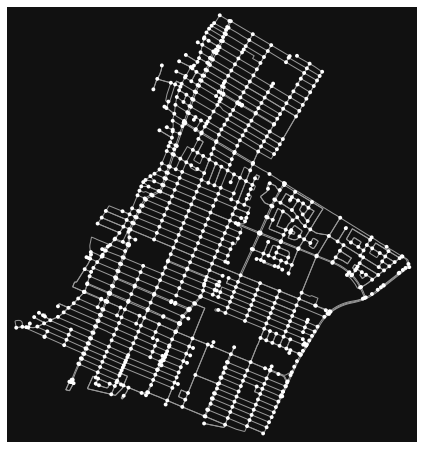

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


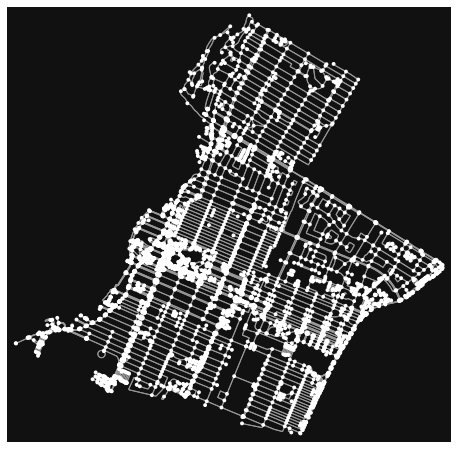

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Cartierville, Montreal, Canada


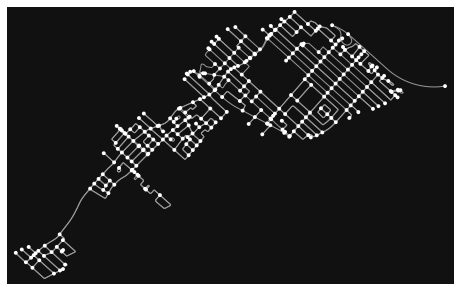

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


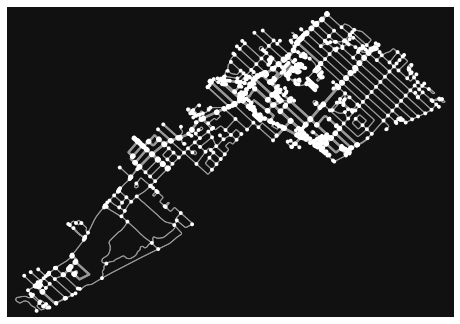

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
Pierrefonds-Roxboro, Montreal, Canada


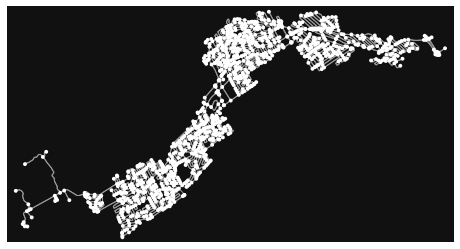

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


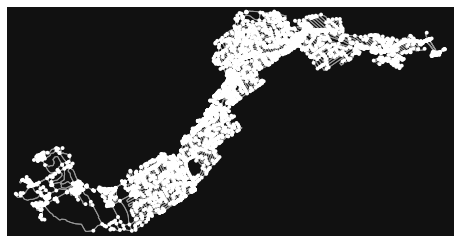

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
L'île-Bizard-Sainte-Geneviève, Montreal, Canada


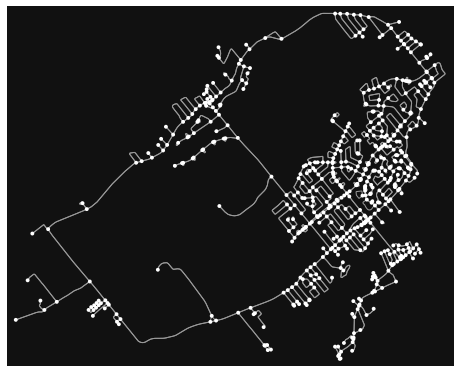

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


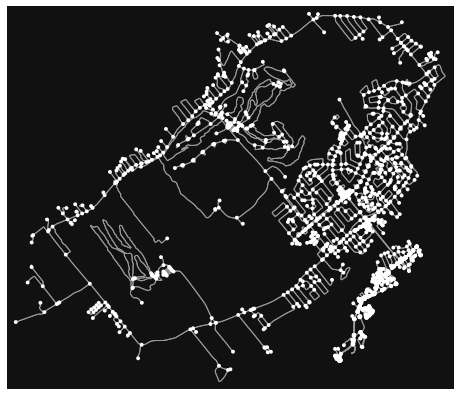

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)


In [23]:
graphs = pull_all_graph(listofquarter)

In [39]:
(graph_drive, graph_walk) = graphs

drive = find_size_of_each_quarter(listofquarter, graph_drive)
walk  = find_size_of_each_quarter(listofquarter, graph_walk)

Verdun, Montreal, Canada
103030.82699999987
LaSalle, Montreal, Canada
327102.20599999966
Borough of Lachine, Montreal, Canada
266243.77900000056
Saint-Laurent, Montreal, Canada
601857.605999998
Le Sud-Ouest, Montreal, Canada
272056.6470000001
Côte-des-Neiges-Notre-Dame-de-Grâce, Montreal, Canada
359709.7689999996
Ville-Marie, Montreal, Canada
273484.6549999998
Outremont, Montreal, Canada
73699.052
Le Plateau-Mont-Royal, Montreal, Canada
170335.16299999977
Rosemont-La Petite-Patrie, Montreal, Canada
279994.9649999991
Hochelaga, Montreal, Canada
22798.042000000005
Maisonneuve, Montreal, Canada
47705.07299999999
Anjou, Montreal, Canada
238484.23500000016
Rivière-des-Prairies, Montreal, Canada
176728.16299999994
Pointe-aux-Trembles, Montreal, Canada
330629.6569999991
Montréal-Nord, Montreal, Canada
242483.67400000012
Saint-Léonard, Montreal, Canada
319198.91800000076
Villeray-Saint-Michel-Parc-Extension, Montreal, Canada
301796.68999999954
Ahuntsic, Montreal, Canada
247607.03900000005
Cart

In [40]:
import math

def resolve_function(listofquarter, nb_snowplot, speed_snowplot, drive, walk):
    

    (a_drive, b_drive) = drive
    (a_walk, b_walk) = walk

    speed_deneigeuse = 15

    allsuperficy = a_drive + a_walk
    snowplot_walk = math.floor((nb_snowplot * a_walk) / allsuperficy)
    snowplot_drive = math.floor((nb_snowplot * a_drive) / allsuperficy)

    array_of_quarter_snowplot = divide_nb_snowplot_by_quarter(b_drive, a_drive, snowplot_drive)
    array_of_quarter_snowplot_walk = divide_nb_snowplot_by_quarter(b_walk, a_walk, snowplot_walk)

    show_road_for_each_snowplot(array_of_quarter_snowplot, listofquarter, graph_drive, speed_snowplot)
    show_road_for_each_snowplot(array_of_quarter_snowplot_walk, listofquarter, graph_walk, speed_snowplot)

In [ ]:
resolve_function(listofquarter, 2200, 15, drive, walk)